### This project is part of a course called "Machine Learning With Python" offered by IBM on Coursera. <sup>[1]</sup>

## Import Packages

In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline

## Download Data

Data source: [Fuel Consumption Ratings, Government of Canada](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)  
Uploaded on IBM Object Storage.

In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2019-09-10 12:02:10--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.03s   

2019-09-10 12:02:10 (2.24 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



## Understanding Data

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


In [3]:
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Exploratory Data Analysis

In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


<function matplotlib.pyplot.show(*args, **kw)>

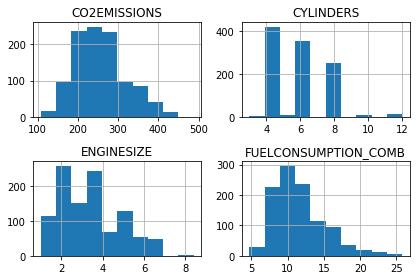

In [36]:
# Getting a subset of important features
cdf = df[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.hist()
plt.tight_layout()
plt.show

### Observing relationships

Text(602.1720588235295, 0.5, 'Emission')

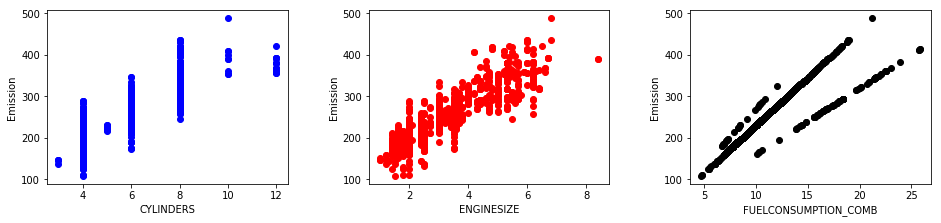

In [37]:
fig, axes = plt.subplots(1,3, figsize=(13, 3))
fig.tight_layout(w_pad=5) 

#plotting CYLINDERS Vs Co2 emission
axes[0].scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
axes[0].set_xlabel("CYLINDERS")
axes[0].set_ylabel("Emission")

#plotting engine_size Vs Co2 emission
axes[1].scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='red')
axes[1].set_xlabel("ENGINESIZE")
axes[1].set_ylabel("Emission")

#plotting FUELCONSUMPTION_COMB Vs Co2 emission
axes[2].scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='black')
axes[2].set_xlabel("FUELCONSUMPTION_COMB")
axes[2].set_ylabel("Emission")


## Train/Test Split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(cdf.loc[:, cdf.columns != 'CO2EMISSIONS'],cdf.CO2EMISSIONS, train_size = 0.8)

#alternate way to split
#msk = np.random.rand(len(df)) < 0.8
#train = cdf[msk]
#test = cdf[~msk]
#X_train = train['ENGINESIZE']
#y_train = train['CO2EMISSIONS']
#X_test = test['ENGINESIZE']
#y_test = test['CO2EMISSIONS']

## Modeling

In [61]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
feature = np.asanyarray(X_train['ENGINESIZE'])
y_train = np.asanyarray(y_train)
feature = feature.reshape(-1,1)
regr.fit(feature,y_train)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [39.22351475]
Intercept:  124.74043598137402


## Plotting best fit line

Text(0, 0.5, 'Emission')

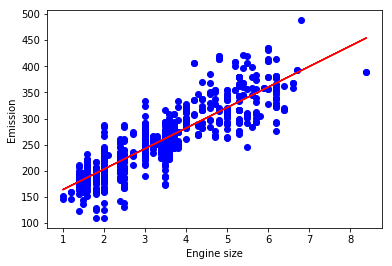

In [67]:
plt.scatter(X_train.ENGINESIZE, y_train,  color='blue')
plt.plot(X_train.ENGINESIZE, regr.coef_[0]*X_train.ENGINESIZE + regr.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

## Model Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:
+ **Mean absolute error**: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
+ **Mean Squared Error (MSE)**: Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
+ **Root Mean Squared Error (RMSE)**: This is the square root of the Mean Square Error.
+ **R-squared** is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [74]:
feature = np.asanyarray(X_test.ENGINESIZE)
feature = feature.reshape(-1,1)
y_hat = regr.predict(feature)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_hat ,y_test) )

Mean absolute error: 24.45
Residual sum of squares (MSE): 955.28
R2-score: 0.70


## References:
[1] https://www.coursera.org/learn/machine-learning-with-python/home/welcome